In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial import distance
from sklearn.preprocessing import scale

if __name__ == '__main__':
    if __package__ is None:
        import sys
        from os import path
        sys.path.append(path.abspath('..'))
        from dramas import dramas
    else:
        from ..dramas import dramas

In [2]:
four_act_dramas = [drama for drama in dramas if len(drama['data']) == 4]
five_act_dramas = [drama for drama in dramas if len(drama['data']) == 5]

In [3]:
def act_density(act):
    return np.count_nonzero(act)/act.size

def act_densities(drama):
    data = drama['data']
    heroes = list(sorted(set([hero for act in data for scene in act for hero in scene])))
    acts = [np.array([[1 if hero in scene else 0 for scene in act] for hero in heroes]) for act in data]
    return [act_density(act) for act in acts]

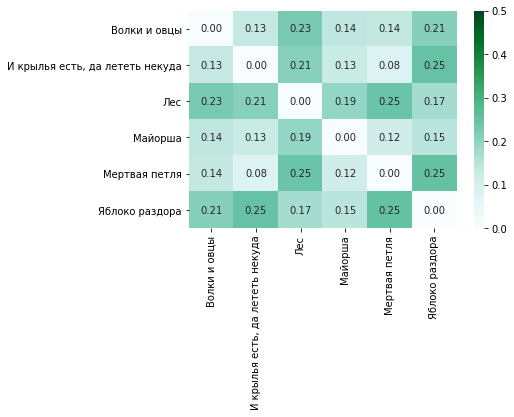

In [4]:
index = [drama['name'] for drama in five_act_dramas]
densities = pd.DataFrame([act_densities(drama) for drama in five_act_dramas], index=index)
distances = pd.DataFrame(distance.cdist(densities, densities), index=index, columns=index)

sns.heatmap(distances, cmap='BuGn', vmin=0, vmax=0.5, annot=True, xticklabels=index, yticklabels=index, fmt='.2f')

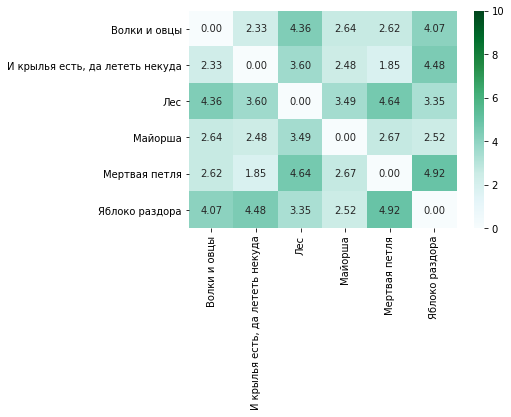

In [5]:
scaled_densities = pd.DataFrame(scale(densities), index=index)
distances_from_scaled_densities = pd.DataFrame(distance.cdist(scaled_densities, scaled_densities), index=index, columns=index)

sns.heatmap(distances_from_scaled_densities, cmap='BuGn', vmin=0, vmax=10, annot=True, xticklabels=index, yticklabels=index, fmt='.2f')

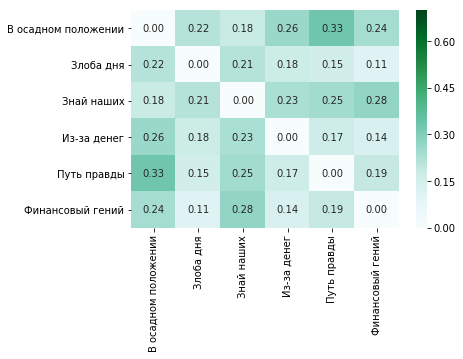

In [6]:
index = [drama['name'] for drama in four_act_dramas]
densities = pd.DataFrame([act_densities(drama) for drama in four_act_dramas], index=index)
distances = pd.DataFrame(distance.cdist(densities, densities), index=index, columns=index)

sns.heatmap(distances, cmap='BuGn', vmin=0, vmax=0.7, annot=True, xticklabels=index, yticklabels=index, fmt='.2f')

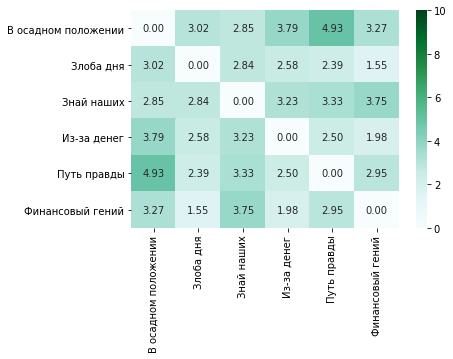

In [7]:
scaled_densities = pd.DataFrame(scale(densities), index=index)
distances_from_scaled_densities = pd.DataFrame(distance.cdist(scaled_densities, scaled_densities), index=index, columns=index)

sns.heatmap(distances_from_scaled_densities, cmap='BuGn', vmin=0, vmax=10, annot=True, xticklabels=index, yticklabels=index, fmt='.2f')